# Введение
В данной работе осуществляется поиск ассоциативных правил.<br>
В первой части применяются алгоритмы `apriori`, `efficient_apriori` и `fpgrowth` на заданном мной датасете, содержащий 30 чеков покупок из магазина бытовой техники. Осуществляется вывод и визуализация полученных ассоциативных правил, а также сравнение по времени выполнения работы алгоритмов при 60% и 80% минимальными уровнями достоверности.<br>
Вторая часть отличается от первой тем, что в качестве датасете берётся <a href="https://archive.ics.uci.edu/dataset/352/online+retail">Online Retail</a>, содержащий намного больше транзакций чем первый


## Часть №1

In [5]:
from pprint import pprint
import pandas as pd
import numpy as np
from apriori_python import apriori
from pprint import pprint
import time
import matplotlib.pyplot as plt
import PyARMViz

ModuleNotFoundError: No module named 'apriori_python'

Сформируем 30 транзакций максимальной длинны 5, содержащие следующие 8 товаров:
* холодильник 
* стиральная машина
* посудомойка
* кофемашина
* тостер
* вафельница
* пылесос
* кондиционер

In [25]:
data = [['холодильник', 'стиральная машина', 'посудомойка', 'кофемашина', 'пылесос'],
        ['холодильник', 'стиральная машина', 'посудомойка', 'вафельница', 'кондиционер'],
        ['холодильник', 'стиральная машина', 'посудомойка', 'пылесос', 'вафельница'],
        ['холодильник', 'стиральная машина', 'посудомойка', 'вафельница', 'кондиционер'],
        ['холодильник', 'стиральная машина', 'посудомойка', 'кофемашина', 'вафельница'],
        ['холодильник', 'стиральная машина', 'посудомойка', 'кофемашина', 'тостер'],
        ['холодильник', 'стиральная машина', 'посудомойка', 'кондиционер'],
        ['холодильник', 'стиральная машина', 'посудомойка', 'пылесос'],
        ['холодильник', 'стиральная машина'],
        ['холодильник', 'посудомойка'],
        ['холодильник', 'стиральная машина'],
        ['стиральная машина', 'посудомойка', 'пылесос'],
        ['кофемашина', 'тостер', 'вафельница'],
        ['кофемашина', 'тостер', 'пылесос'],
        ['кофемашина', 'тостер', 'кондиционер'],
        ['кофемашина', 'тостер', 'посудомойка'],
        ['кофемашина', 'вафельница', 'тостер'],
        ['кофемашина', 'вафельница', 'холодильник'],
        ['кофемашина', 'вафельница', 'кондиционер'],
        ['кофемашина', 'вафельница', 'посудомойка'],
        ['кофемашина', 'тостер', 'холодильник', 'стиральная машина', 'посудомойка'],
        ['кофемашина', 'вафельница', 'холодильник', 'стиральная машина', 'посудомойка'],
        ['кофемашина', 'тостер'],
        ['кофемашина', 'вафельница'],
        ['вафельница', 'посудомойка'],
        ['кофемашина', 'вафельница', 'холодильник', 'стиральная машина', 'посудомойка'],
        ['кофемашина', 'тостер', 'холодильник', 'стиральная машина', 'посудомойка'],
        ['кондиционер', 'холодильник'],
        ['кондиционер'],
        ['вафельница']]

In [26]:
df = pd.DataFrame(data)
pd.Series(data).value_counts()

[холодильник, стиральная машина, посудомойка, вафельница, кондиционер]    2
[холодильник, стиральная машина]                                          2
[кофемашина, тостер, холодильник, стиральная машина, посудомойка]         2
[кофемашина, вафельница, холодильник, стиральная машина, посудомойка]     2
[холодильник, стиральная машина, посудомойка, кофемашина, пылесос]        1
[холодильник, стиральная машина, посудомойка, пылесос, вафельница]        1
[холодильник, стиральная машина, посудомойка, кондиционер]                1
[холодильник, стиральная машина, посудомойка, пылесос]                    1
[холодильник, стиральная машина, посудомойка, кофемашина, тостер]         1
[холодильник, стиральная машина, посудомойка, кофемашина, вафельница]     1
[стиральная машина, посудомойка, пылесос]                                 1
[холодильник, посудомойка]                                                1
[кофемашина, тостер, вафельница]                                          1
[кофемашина,

1) Применим алгоритм `apriory` с минимальными уронями поддержки и достоверности в 30% и 60% соответсвенно.

In [27]:
start_time = time.time()
freqItemSet, rules = apriori(data, minSup=0.3, minConf=0.6)
end_time = time.time()
work_apriory_time_60 = end_time - start_time
print('Время работы {}'.format(work_apriory_time_60))
pprint(freqItemSet)
pprint(rules)

Время работы 0.0
{1: {frozenset({'посудомойка'}),
     frozenset({'кофемашина'}),
     frozenset({'тостер'}),
     frozenset({'холодильник'}),
     frozenset({'стиральная машина'}),
     frozenset({'вафельница'})},
 2: {frozenset({'посудомойка', 'кофемашина'}),
     frozenset({'посудомойка', 'холодильник'}),
     frozenset({'посудомойка', 'стиральная машина'}),
     frozenset({'кофемашина', 'тостер'}),
     frozenset({'стиральная машина', 'холодильник'}),
     frozenset({'кофемашина', 'вафельница'})},
 3: {frozenset({'посудомойка', 'холодильник', 'стиральная машина'})}}
[[{'вафельница'}, {'кофемашина'}, 0.6428571428571429],
 [{'посудомойка'}, {'стиральная машина', 'холодильник'}, 0.7058823529411765],
 [{'холодильник'}, {'посудомойка', 'стиральная машина'}, 0.7058823529411765],
 [{'посудомойка'}, {'холодильник'}, 0.7647058823529411],
 [{'холодильник'}, {'посудомойка'}, 0.7647058823529411],
 [{'посудомойка'}, {'стиральная машина'}, 0.7647058823529411],
 [{'стиральная машина'}, {'посудомо

То же самое но с достоверностью в 80%

In [28]:
start_time = time.time()
freqItemSet, rules = apriori(data, minSup=0.3, minConf=0.8)
end_time = time.time()
work_apriory_time_80 = end_time - start_time
print('Время работы {}'.format(work_apriory_time_80))
pprint(freqItemSet)
pprint(rules)

Время работы 0.0
{1: {frozenset({'посудомойка'}),
     frozenset({'кофемашина'}),
     frozenset({'тостер'}),
     frozenset({'холодильник'}),
     frozenset({'стиральная машина'}),
     frozenset({'вафельница'})},
 2: {frozenset({'посудомойка', 'кофемашина'}),
     frozenset({'посудомойка', 'холодильник'}),
     frozenset({'посудомойка', 'стиральная машина'}),
     frozenset({'кофемашина', 'тостер'}),
     frozenset({'стиральная машина', 'холодильник'}),
     frozenset({'кофемашина', 'вафельница'})},
 3: {frozenset({'посудомойка', 'холодильник', 'стиральная машина'})}}
[[{'холодильник'}, {'стиральная машина'}, 0.8235294117647058],
 [{'стиральная машина', 'холодильник'}, {'посудомойка'}, 0.8571428571428571],
 [{'стиральная машина'}, {'посудомойка'}, 0.8666666666666667],
 [{'посудомойка', 'холодильник'}, {'стиральная машина'}, 0.9230769230769231],
 [{'посудомойка', 'стиральная машина'}, {'холодильник'}, 0.9230769230769231],
 [{'стиральная машина'}, {'холодильник'}, 0.9333333333333333],


2) Теперь применим алгоритм `efficient_apriori` с минимальными уронями поддержки и достоверности в 30% и 60% соответсвенно.

In [29]:
from efficient_apriori import apriori as efficient_apriori 
start_time = time.time()
itemsets, rules = efficient_apriori(data, min_support=0.3, min_confidence=0.6)
end_time = time.time()
work_efficient_apriory_time_60 = end_time - start_time
print('Время работы {}'.format(work_efficient_apriory_time_60))
print(itemsets)
for rule in sorted(rules, key=lambda rule: rule.lift):
        print("{}".format(rule))
PyARMViz.metadata_scatter_plot(rules)



Время работы 0.0
{1: {('холодильник',): 17, ('стиральная машина',): 15, ('посудомойка',): 17, ('кофемашина',): 17, ('вафельница',): 14, ('тостер',): 9}, 2: {('вафельница', 'кофемашина'): 9, ('кофемашина', 'посудомойка'): 9, ('кофемашина', 'тостер'): 9, ('посудомойка', 'стиральная машина'): 13, ('посудомойка', 'холодильник'): 13, ('стиральная машина', 'холодильник'): 14}, 3: {('посудомойка', 'стиральная машина', 'холодильник'): 12}}
{вафельница} -> {кофемашина} (conf: 0.643, supp: 0.300, lift: 1.134, conv: 1.213)
{холодильник} -> {посудомойка} (conf: 0.765, supp: 0.433, lift: 1.349, conv: 1.842)
{посудомойка} -> {холодильник} (conf: 0.765, supp: 0.433, lift: 1.349, conv: 1.842)
{стиральная машина, холодильник} -> {посудомойка} (conf: 0.857, supp: 0.400, lift: 1.513, conv: 3.033)
{посудомойка} -> {стиральная машина, холодильник} (conf: 0.706, supp: 0.400, lift: 1.513, conv: 1.813)
{стиральная машина} -> {посудомойка} (conf: 0.867, supp: 0.433, lift: 1.529, conv: 3.250)
{посудомойка} -> {

То же самое но с достоверностью в 80%

In [30]:
start_time = time.time()
itemsets, rules = efficient_apriori(data, min_support=0.3, min_confidence=0.8)
end_time = time.time()
work_efficient_apriory_time_80 = end_time - start_time
print('Время работы {}'.format(work_efficient_apriory_time_80))
print(itemsets)
for rule in sorted(rules, key=lambda rule: rule.lift):
        print("{}".format(rule))
PyARMViz.metadata_scatter_plot(rules)

Время работы 0.0
{1: {('холодильник',): 17, ('стиральная машина',): 15, ('посудомойка',): 17, ('кофемашина',): 17, ('вафельница',): 14, ('тостер',): 9}, 2: {('вафельница', 'кофемашина'): 9, ('кофемашина', 'посудомойка'): 9, ('кофемашина', 'тостер'): 9, ('посудомойка', 'стиральная машина'): 13, ('посудомойка', 'холодильник'): 13, ('стиральная машина', 'холодильник'): 14}, 3: {('посудомойка', 'стиральная машина', 'холодильник'): 12}}
{стиральная машина, холодильник} -> {посудомойка} (conf: 0.857, supp: 0.400, lift: 1.513, conv: 3.033)
{стиральная машина} -> {посудомойка} (conf: 0.867, supp: 0.433, lift: 1.529, conv: 3.250)
{посудомойка, стиральная машина} -> {холодильник} (conf: 0.923, supp: 0.400, lift: 1.629, conv: 5.633)
{холодильник} -> {стиральная машина} (conf: 0.824, supp: 0.467, lift: 1.647, conv: 2.833)
{стиральная машина} -> {холодильник} (conf: 0.933, supp: 0.467, lift: 1.647, conv: 6.500)
{тостер} -> {кофемашина} (conf: 1.000, supp: 0.300, lift: 1.765, conv: 433333333.333)
{п

3) И алгоритм `efficient_apriori` с минимальными уронями поддержки и достоверности в 30% и 60% соответсвенно.

In [31]:
from fpgrowth_py import fpgrowth

start_time = time.time()
freqItemSet, rules = fpgrowth(data, minSupRatio=0.3, minConf=0.6)
end_time = time.time()
work_fpgrowth_time_60 = end_time - start_time
print(work_fpgrowth_time_60)
print(freqItemSet)
sorted(rules, key=lambda rule: rule[2])


0.0010020732879638672
[{'тостер'}, {'кофемашина', 'тостер'}, {'вафельница'}, {'кофемашина', 'вафельница'}, {'стиральная машина'}, {'посудомойка', 'стиральная машина'}, {'посудомойка', 'стиральная машина', 'холодильник'}, {'стиральная машина', 'холодильник'}, {'холодильник'}, {'посудомойка'}, {'посудомойка', 'холодильник'}, {'кофемашина'}]


[[{'вафельница'}, {'кофемашина'}, 0.6428571428571429],
 [{'посудомойка'}, {'стиральная машина', 'холодильник'}, 0.7058823529411765],
 [{'холодильник'}, {'посудомойка', 'стиральная машина'}, 0.7058823529411765],
 [{'посудомойка'}, {'стиральная машина'}, 0.7647058823529411],
 [{'посудомойка'}, {'холодильник'}, 0.7647058823529411],
 [{'холодильник'}, {'посудомойка'}, 0.7647058823529411],
 [{'стиральная машина'}, {'посудомойка', 'холодильник'}, 0.8],
 [{'холодильник'}, {'стиральная машина'}, 0.8235294117647058],
 [{'стиральная машина', 'холодильник'}, {'посудомойка'}, 0.8571428571428571],
 [{'стиральная машина'}, {'посудомойка'}, 0.8666666666666667],
 [{'посудомойка', 'стиральная машина'}, {'холодильник'}, 0.9230769230769231],
 [{'посудомойка', 'холодильник'}, {'стиральная машина'}, 0.9230769230769231],
 [{'стиральная машина'}, {'холодильник'}, 0.9333333333333333],
 [{'тостер'}, {'кофемашина'}, 1.0]]

То же самое но с достоверностью в 80%

In [32]:
start_time = time.time()
freqItemSet, rules = fpgrowth(data, minSupRatio=0.3, minConf=0.8)
end_time = time.time()
work_fpgrowth_time_80 = end_time - start_time
print(work_fpgrowth_time_80)
print(freqItemSet)
sorted(rules, key=lambda rule: rule[2])

0.0
[{'тостер'}, {'кофемашина', 'тостер'}, {'вафельница'}, {'кофемашина', 'вафельница'}, {'стиральная машина'}, {'посудомойка', 'стиральная машина'}, {'посудомойка', 'стиральная машина', 'холодильник'}, {'стиральная машина', 'холодильник'}, {'холодильник'}, {'посудомойка'}, {'посудомойка', 'холодильник'}, {'кофемашина'}]


[[{'холодильник'}, {'стиральная машина'}, 0.8235294117647058],
 [{'стиральная машина', 'холодильник'}, {'посудомойка'}, 0.8571428571428571],
 [{'стиральная машина'}, {'посудомойка'}, 0.8666666666666667],
 [{'посудомойка', 'стиральная машина'}, {'холодильник'}, 0.9230769230769231],
 [{'посудомойка', 'холодильник'}, {'стиральная машина'}, 0.9230769230769231],
 [{'стиральная машина'}, {'холодильник'}, 0.9333333333333333],
 [{'тостер'}, {'кофемашина'}, 1.0]]

4) Сравним время выполнения алгоритмов

                   algorithm_time_60  algorithm_time_80
apriory                     0.000000                0.0
efficient_apriory           0.000000                0.0
fpgrowth                    0.001002                0.0


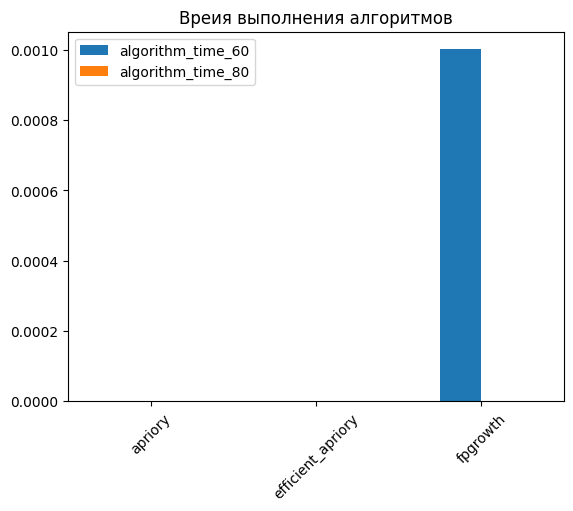

In [33]:
data = {'algorithm_time_60': [work_apriory_time_60, work_efficient_apriory_time_60, work_fpgrowth_time_60],
        'algorithm_time_80': [work_apriory_time_80, work_efficient_apriory_time_80, work_fpgrowth_time_80]
        }
df = pd.DataFrame(data,index = ['apriory', 'efficient_apriory', 'fpgrowth'])
print(df)
df.plot(kind='bar', label='algorithm_time', rot=45)
plt.legend()
plt.title('Вреия выполнения алгоритмов');

## Часть №2

Считаем датасет из файла

In [34]:
df = pd.read_excel(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_1_2\Online Retail.xlsx')
df.head()

* `InvoiceNo` - идентификатор трранзакции. Если начинатеся на `C` - отменена
Приведём столбцы к нужному типу
* `StockCode` - идентификатор товара
* `Quantity` - кол-во данного товара в транзакции
* `InvoiceDate` - дата и время проведегния транзакции
* `UnitPrice` - цена товара
* `CustomerID` - идентификатор покупателя
* `Country` - название страны, в которой проживает покупатель

In [35]:
df['InvoiceNo'] = df.InvoiceNo.astype('string')
df['Quantity']= df.Quantity.astype('int') 
df['StockCode']= df.StockCode.astype('string') 

In [36]:
print(df.shape)
new_df = df.copy(deep=True)

(541909, 8)


Удалим отменённые транзакции (Значение в `InvoiceNo` начинаются с символа `C`)

In [37]:

new_df.drop(df.loc[df['InvoiceNo'].str.startswith('C'), 'InvoiceNo'].index, inplace=True)


In [38]:
new_df.shape

(532621, 8)

Сформируем транзакции в виде списка списков, учитывая при этом кол-во каждого товара.

In [39]:
check_info = {}
# i = 0
for row in df.iterrows():
    if row[1]['InvoiceNo'] not in check_info:
        check_info[row[1]['InvoiceNo']] = []
    check_info[row[1]['InvoiceNo']].extend([row[1]['StockCode']]*row[1]['Quantity'])
    # check_info[row[1]['InvoiceNo']].extend([row[1]['StockCode']])
    if len(check_info[row[1]['InvoiceNo']]) == 0:
        check_info.pop(row[1]['InvoiceNo'])
    # print(row[1])
    # i+=1
    # if i==100:
    #     break
# print(check_info)


Отобразить время выполнения работы алгоритмов bar plot, визуализировать правила, протестировать на большом датасете
Загрузить в collab

In [40]:
data = []
for x in check_info:
    data.append(check_info[x])
print(data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



1) Применим алгоритм `apriory` с минимальными уронями поддержки и достоверности в 1% и 60% соответсвенно.

In [41]:
start_time = time.time()
freqItemSet, rules = apriori(data, minSup=0.01, minConf=0.6)
end_time = time.time()
work_apriory_time_60 = end_time - start_time
print(work_apriory_time_60)
pprint(freqItemSet)
pprint(rules)

KeyboardInterrupt: 

То же самое, но с достоверностью в 80%

In [ ]:
start_time = time.time()
freqItemSet, rules = apriori(data, minSup=0.01, minConf=0.8)
end_time = time.time()
work_apriory_time_80 = end_time - start_time
print(work_apriory_time_80)
pprint(freqItemSet)
pprint(rules)

2) Теперь применим алгоритм `efficient_apriori` с минимальными уронями поддержки и достоверности в 1% и 60% соответсвенно.

In [274]:

start_time = time.time()
itemsets, rules = efficient_apriori(data, min_support=0.01, min_confidence=0.6)
end_time = time.time()
work_efficient_apriory_time_60 = end_time - start_time
print(work_efficient_apriory_time_60)
print(itemsets)
for rule in sorted(rules, key=lambda rule: rule.lift):
        print("{}".format(rule))
PyARMViz.metadata_scatter_plot(rules)



234.20872807502747
{23199, 23201} -> {85099B} (conf: 0.601, supp: 0.011, lift: 5.955, conv: 2.253)
{22663} -> {85099B} (conf: 0.611, supp: 0.013, lift: 6.055, conv: 2.312)
{21931} -> {85099B} (conf: 0.611, supp: 0.035, lift: 6.059, conv: 2.314)
{23199, 23202} -> {85099B} (conf: 0.615, supp: 0.011, lift: 6.097, conv: 2.338)
{23199, 23203} -> {85099B} (conf: 0.618, supp: 0.013, lift: 6.126, conv: 2.355)
{20712} -> {85099B} (conf: 0.620, supp: 0.026, lift: 6.142, conv: 2.366)
{22385} -> {85099B} (conf: 0.625, supp: 0.021, lift: 6.193, conv: 2.398)
{21733} -> {85123A} (conf: 0.660, supp: 0.024, lift: 6.209, conv: 2.628)
{85099C} -> {85099B} (conf: 0.627, supp: 0.028, lift: 6.213, conv: 2.410)
{20711} -> {85099B} (conf: 0.658, supp: 0.017, lift: 6.517, conv: 2.627)
{85099F} -> {85099B} (conf: 0.658, supp: 0.026, lift: 6.520, conv: 2.630)
{21928} -> {85099B} (conf: 0.671, supp: 0.026, lift: 6.651, conv: 2.735)
{22804} -> {85123A} (conf: 0.709, supp: 0.016, lift: 6.670, conv: 3.070)
{22386} -

То же самое но с достоверностью в 80%

In [275]:
start_time = time.time()
itemsets, rules = efficient_apriori(data, min_support=0.01, min_confidence=0.8)
end_time = time.time()
work_efficient_apriory_time_80 = end_time - start_time
print('Время работы {}'.format(work_efficient_apriory_time_80))
print(itemsets)
for rule in sorted(rules, key=lambda rule: rule.lift):
        print("{}".format(rule))
PyARMViz.metadata_scatter_plot(rules)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
done


In [276]:
rules

[{20677} -> {20675},
 {20675} -> {20677},
 {20711} -> {85099B},
 {20712} -> {85099B},
 {20719} -> {20724},
 {20723} -> {20724},
 {22356} -> {20724},
 {21086} -> {21080},
 {21094} -> {21080},
 {21094} -> {21086},
 {21086} -> {21094},
 {21136} -> {84879},
 {21231} -> {21232},
 {21240} -> {21239},
 {21239} -> {21240},
 {21671} -> {21668},
 {21733} -> {85123A},
 {21901} -> {21900},
 {21928} -> {85099B},
 {21931} -> {85099B},
 {21933} -> {21932},
 {21932} -> {21933},
 {21934} -> {21935},
 {21935} -> {DOT},
 {22910} -> {22086},
 {22617} -> {22138},
 {22141} -> {22144},
 {22142} -> {22144},
 {22385} -> {85099B},
 {22386} -> {85099B},
 {22569} -> {22570},
 {22578} -> {22577},
 {22577} -> {22578},
 {22579} -> {22577},
 {22579} -> {22578},
 {22630} -> {22629},
 {22663} -> {85099B},
 {22698} -> {22697},
 {22697} -> {22698},
 {22699} -> {22697},
 {22697} -> {22699},
 {23171} -> {22697},
 {22698} -> {22699},
 {23170} -> {22699},
 {22725} -> {22726},
 {22725} -> {22727},
 {22727} -> {22726},
 {22726

3) И алгоритм `efficient_apriori` с минимальными уронями поддержки и достоверности в 1% и 60% соответсвенно.

In [ ]:
start_time = time.time()
freqItemSet, rules = fpgrowth(data, minSupRatio=0.01, minConf=0.6)
end_time = time.time()
work_fpgrowth_time_60 = end_time - start_time
print(work_fpgrowth_time_60)
print(freqItemSet)
sorted(rules, key=lambda rule: rule[2])

То же самое но с достоверностью в 80%

In [ ]:
start_time = time.time()
freqItemSet, rules = fpgrowth(data, minSupRatio=0.01, minConf=0.8)
end_time = time.time()
work_fpgrowth_time_80 = end_time - start_time
print(work_fpgrowth_time_80)
print(freqItemSet)
sorted(rules, key=lambda rule: rule[2])

4) Сравним время выполнения алгоритмов

                   algorithm_time_60  algorithm_time_80
apriory                           10                100
efficient_apriory                  5                 50
fpgrowth                           2                 20


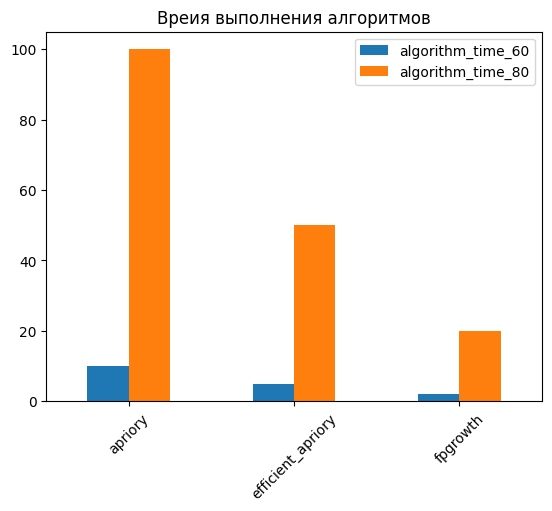

In [3]:
data = {'algorithm_time_60': [work_apriory_time_60, work_efficient_apriory_time_60, work_fpgrowth_time_60],
        'algorithm_time_80': [work_apriory_time_80, work_efficient_apriory_time_80, work_fpgrowth_time_80]
        }
df = pd.DataFrame(data,index = ['apriory', 'efficient_apriory', 'fpgrowth'])
print(df)
df.plot(kind='bar', label='algorithm_time', rot=45)
plt.legend()
plt.title('Вреия выполнения алгоритмов');